In [1]:
!pip install pandas numpy seaborn matplotlib tensorflow keras sklearn &> /dev/null

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

import time
start_time = time.time()

In [3]:
PATH_DATA_TRAIN = '../input/cars-data-ttv-80-10-10/data-preprocessed/data-preprocessed/train'
PATH_DATA_TEST = '../input/cars-data-ttv-80-10-10/data-preprocessed/data-preprocessed/test'
PATH_DATA_VALIDATION = '../input/cars-data-ttv-80-10-10/data-preprocessed/data-preprocessed/validation'
PATH_SAVED_MODEL = 'inception-v3.h5'

# Load Dataset As Generators

In [4]:
generator = ImageDataGenerator(rescale = 1./255.)

target_size = (100, 100)
batch_size = 32

train_batches = generator.flow_from_directory(
    PATH_DATA_TRAIN, class_mode='categorical', 
    batch_size=batch_size, target_size=target_size
)

validation_batches = generator.flow_from_directory(
    PATH_DATA_VALIDATION, class_mode='categorical',  
    batch_size=batch_size, target_size=target_size
)

test_batches = generator.flow_from_directory(
    PATH_DATA_TEST, class_mode='categorical', shuffle=False, 
    batch_size=batch_size, target_size=target_size
)

Found 12959 images belonging to 7 classes.
Found 1616 images belonging to 7 classes.
Found 1610 images belonging to 7 classes.


In [5]:
# preview data (batch size, width, height, colors)
print('x_train shape:', train_batches[0][0].shape)
print('x_validation shape:', validation_batches[0][0].shape)
print('x_test shape:', test_batches[0][0].shape)
print('y_train shape:', train_batches[0][1].shape)
print('y_validation shape:', validation_batches[0][1].shape)
print('y_test shape:', test_batches[0][1].shape)

x_train shape: (32, 100, 100, 3)
x_validation shape: (32, 100, 100, 3)
x_test shape: (32, 100, 100, 3)
y_train shape: (32, 7)
y_validation shape: (32, 7)
y_test shape: (32, 7)


In [6]:
# input & output shape
input_shape = train_batches[0][0][0].shape
output_shape = len(train_batches[0][1][0])

# display input & output shape
print('Input Shape:', input_shape)
print('Output Shape:', output_shape)

Input Shape: (100, 100, 3)
Output Shape: 7


# Build & Compile Model

In [7]:
model = InceptionV3(
    input_shape=input_shape,
    classes=output_shape,
    weights=None,
    classifier_activation='softmax'
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-11-16 10:24:12.786468: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:24:12.787454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:24:12.944419: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:24:12.945399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 10:24:12.946192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

# Train Model

In [8]:
# train model
r = model.fit(train_batches, validation_data=validation_batches, epochs=100)

# save model
model.save(PATH_SAVED_MODEL)

# load model
# model = load_model(PATH_SAVED_MODEL)

2022-11-16 10:24:18.736931: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-16 10:24:27.093863: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


405/405 [==============================] - 182s 406ms/step - loss: 1.7851 - accuracy: 0.3320 - val_loss: 1.7612 - val_accuracy: 0.2692
Epoch 2/100
405/405 [==============================] - 106s 262ms/step - loss: 1.5838 - accuracy: 0.4111 - val_loss: 5.6461 - val_accuracy: 0.3676
Epoch 3/100
405/405 [==============================] - 105s 259ms/step - loss: 1.6123 - accuracy: 0.4006 - val_loss: 4.0456 - val_accuracy: 0.3515
Epoch 4/100
405/405 [==============================] - 104s 256ms/step - loss: 1.5840 - accuracy: 0.4044 - val_loss: 1.9047 - val_accuracy: 0.2785
Epoch 5/100
405/405 [==============================] - 104s 257ms/step - loss: 1.4754 - accuracy: 0.4449 - val_loss: 1.9336 - val_accuracy: 0.3335
Epoch 6/100
405/405 [==============================] - 103s 255ms/step - loss: 1.4454 - accuracy: 0.4643 - val_loss: 1.5146 - val_accuracy: 0.4090
Epoch 7/100
405/405 [==============================] - 104s 257ms/step - loss: 1.4716 - accuracy: 0.4534 - val_loss: 6.0263 - val_

# Evaluate Model's Training & Validation Results

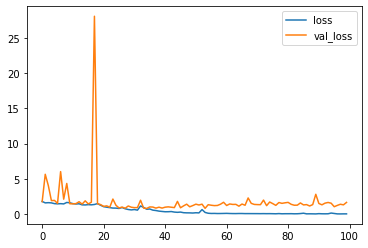

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

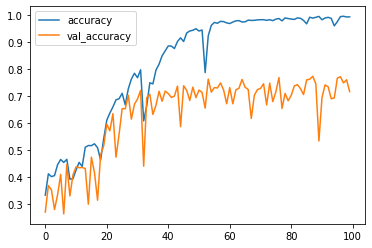

In [10]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Generate Predictions With Model

In [11]:
y_pred = model.predict(test_batches).argmax(axis=1)

In [12]:
model.evaluate(test_batches)

51/51 [==============================] - 11s 222ms/step - loss: 1.5399 - accuracy: 0.7292


[1.539873719215393, 0.7291925549507141]

# Evaluate Model's Prediction Results

In [13]:
# generate classification report
class_labels = list(test_batches.class_indices.keys())
report = classification_report(test_batches.classes, y_pred, target_names=class_labels, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
hatchback,0.526012,0.583333,0.553191,156.000000
mpv,0.584906,0.861111,0.696629,108.000000
sedan,0.735376,0.637681,0.683053,414.000000
sport,0.729831,0.860619,0.789848,452.000000
suv,0.905213,0.672535,0.771717,284.000000
truck,0.872611,0.856250,0.864353,160.000000
wagon,0.500000,0.250000,0.333333,36.000000
accuracy,0.729193,0.729193,0.729193,0.729193
macro avg,0.693421,0.674504,0.670304,1610.000000
weighted avg,0.741774,0.729193,0.727201,1610.000000


Text(0.5, 69.0, 'Predicted Values')

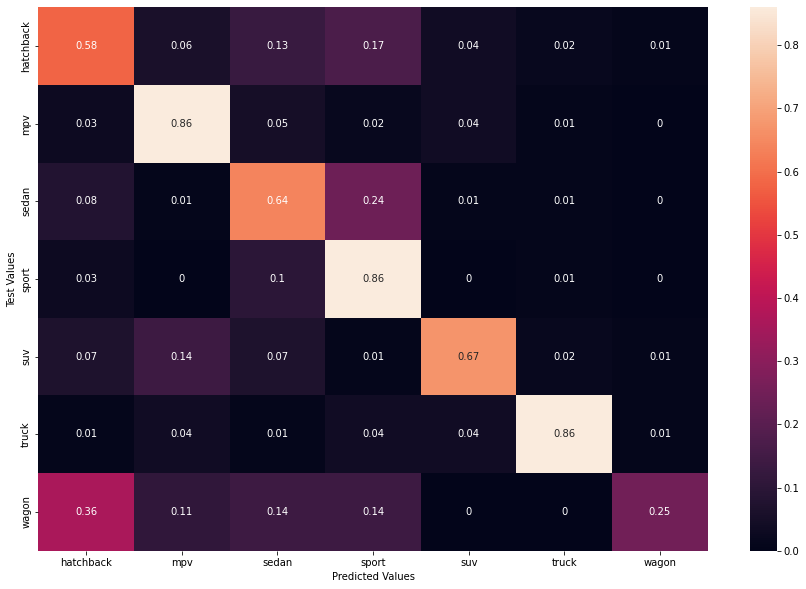

In [14]:
# compute confusion matrix
matrix = confusion_matrix(test_batches.classes, y_pred)

# normalize confusion matrix
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.around(matrix, decimals=2)

# generate confusion matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Test Values')
plt.xlabel('Predicted Values')

# Compute Execution Time

In [15]:
execution_time_s = round(time.time() - start_time, 2)
execution_time_m = round(execution_time_s/60, 2)
execution_time_h = round(execution_time_m/60, 2)

print('Execution Time (Hours):', execution_time_h)
print('Execution Time (Minutes):', execution_time_m)
print('Execution Time (Seconds):', execution_time_s)

Execution Time (Hours): 2.96
Execution Time (Minutes): 177.41
Execution Time (Seconds): 10644.52
